## **GET DATA**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, show
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

path = "/content/drive/MyDrive/lab13/bill_authentication.csv"
df = pd.read_csv(path)
print(df)


      Variance  Skewness  Curtosis  Entropy  Class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Data Cleaning**

Box plot for column  Variance


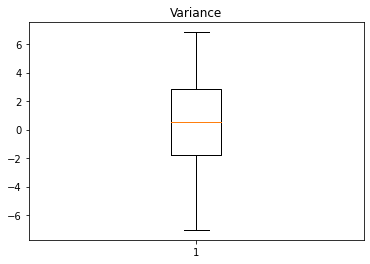

Revised box plot : 


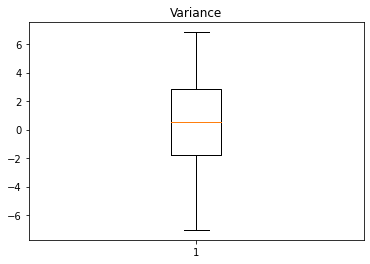

Low outliers count :  0
High outliers count:  0


Box plot for column  Skewness


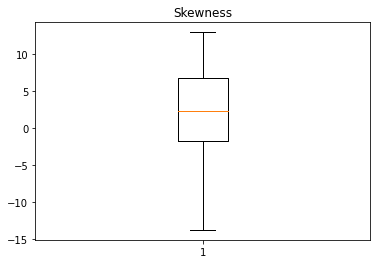

Revised box plot : 


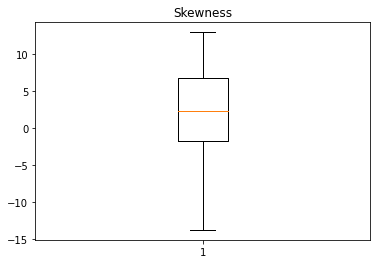

Low outliers count :  0
High outliers count:  0


Box plot for column  Curtosis


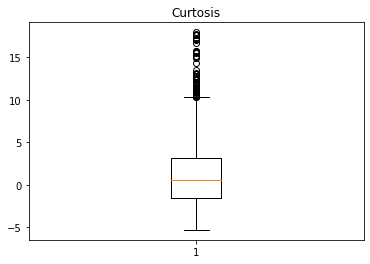

Revised box plot : 


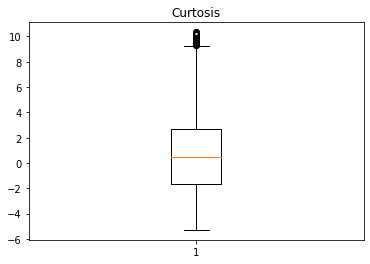

Low outliers count :  0
High outliers count:  0


Box plot for column  Entropy


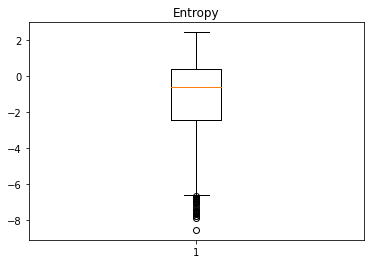

Revised box plot : 


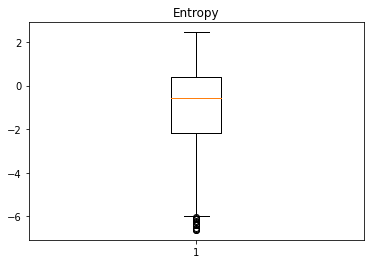

Low outliers count :  0
High outliers count:  0




In [4]:
for column in df:
  if column != 'Class':
    print('Box plot for column ', column)
    plt.title(column)
    plt.boxplot(df[column])
    plt.show()
    q1 = np.percentile(df[column], 25, interpolation = 'midpoint')
    q3 = np.percentile(df[column], 75, interpolation = 'midpoint')
    iqr = q3-q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    df1 = df.loc[df[column] >= lower_bound]
    df2 = df1.loc[df1[column] <= upper_bound]
    cur_low_df = df2.loc[df2[column] <= lower_bound]
    cur_high_df = df2.loc[df2[column] >= upper_bound]
    print("Revised box plot : ")
    plt.title(column)
    plt.boxplot(df2[column])
    plt.show()
    print("Low outliers count : ", len(cur_low_df))
    print("High outliers count: ", len(cur_high_df))
    print()
    print()

## **NAIVE BAYES**

In [5]:
feature_cols = ['Variance', 'Skewness', 'Curtosis','Entropy']
x_nb = df2[feature_cols]
y = np.array(df2['Class']).reshape(-1,1)

x_nb_train, x_nb_test, y_nb_train, y_nb_test = train_test_split(x_nb, y, test_size = 0.2, random_state = 1)

from sklearn.naive_bayes import GaussianNB
gnb_nb = GaussianNB()
gnb_nb.fit(x_nb_train, y_nb_train.ravel())

y_nb_pred = gnb_nb.predict(x_nb_test)

from sklearn import metrics
nb_accuracy = metrics.accuracy_score(y_nb_test, y_nb_pred)
nb_precision = metrics.precision_score(y_nb_test, y_nb_pred)
nb_recall = metrics.recall_score(y_nb_test, y_nb_pred)
nb_confusion_matrix = confusion_matrix(y_nb_test, y_nb_pred)

print("Accuracy based on Naive Bayes : ", "{0:.2f}".format(nb_accuracy*100), "%")
print("Precision based on Naive Bayes : ", "{0:.2f}".format(nb_precision*100), "%")
print("Recall based on Naive Bayes : ", "{0:.2f}".format(nb_recall*100), "%")
print("Confusion Matrix based on Naive Bayes : ")
print(nb_confusion_matrix)

import time
start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))
nb_Time = (time.time() - start_time)

Accuracy based on Naive Bayes :  85.45 %
Precision based on Naive Bayes :  84.11 %
Recall based on Naive Bayes :  80.36 %
Confusion Matrix based on Naive Bayes : 
[[139  17]
 [ 22  90]]
--- 3.647804260253906e-05 seconds ---


## **Decision Tree**

In [6]:
feature_cols = ['Variance', 'Skewness', 'Curtosis','Entropy']
x_dt = df2[feature_cols]
y = np.array(df2['Class']).reshape(-1,1)

x_dt_train, x_dt_test, y_dt_train, y_dt_test = train_test_split(x_dt, y, test_size = 0.2, random_state = 1)


from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt = dt.fit(x_dt_train, y_dt_train)

y_dt_pred = dt.predict(x_dt_test)

from sklearn import metrics
dt_accuracy = metrics.accuracy_score(y_dt_test, y_dt_pred)
dt_precision = metrics.precision_score(y_dt_test, y_dt_pred)
dt_recall = metrics.recall_score(y_dt_test, y_dt_pred)
dt_confusion_matrix = confusion_matrix(y_dt_test, y_dt_pred)

print("Accuracy based on Decision Tree : ", "{0:.2f}".format(dt_accuracy*100), "%")
print("Precision based on Decision Tree : ", "{0:.2f}".format(dt_precision*100), "%")
print("Recall based on Decision Tree : ", "{0:.2f}".format(dt_recall*100), "%")
print("Confusion Matrix based on Decision Tree : ")
print(dt_confusion_matrix)

import time
start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))

dt_Time = (time.time() - start_time)

Accuracy based on Decision Tree :  98.88 %
Precision based on Decision Tree :  97.39 %
Recall based on Decision Tree :  100.00 %
Confusion Matrix based on Decision Tree : 
[[153   3]
 [  0 112]]
--- 3.552436828613281e-05 seconds ---


## **Random Forest**

In [7]:
feature_cols = ['Variance', 'Skewness', 'Curtosis','Entropy']
x_rf = df2[feature_cols]
y = np.array(df2['Class']).reshape(-1,1)

x_rf_train, x_rf_test, y_rf_train, y_rf_test = train_test_split(x_rf, y, test_size = 0.2, random_state = 1)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_rf_train, y_rf_train.ravel())
y_rf_pred = rf.predict(x_rf_test)


from sklearn import metrics
rf_accuracy = metrics.accuracy_score(y_rf_test, y_rf_pred)
rf_precision = metrics.precision_score(y_rf_test, y_rf_pred)
rf_recall = metrics.recall_score(y_rf_test, y_rf_pred)
rf_confusion_matrix = confusion_matrix(y_rf_test, y_rf_pred)

print("Accuracy based on Random Forest : ", "{0:.2f}".format(rf_accuracy*100), "%")
print("Precision based on Random Forest : ", "{0:.2f}".format(rf_precision*100), "%")
print("Recall based on Random Forest : ", "{0:.2f}".format(rf_recall*100), "%")
print("Confusion Matrix based on Random Forest : ")
print(rf_confusion_matrix)

import time
start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))

rf_Time = (time.time() - start_time)

Accuracy based on Random Forest :  99.63 %
Precision based on Random Forest :  99.12 %
Recall based on Random Forest :  100.00 %
Confusion Matrix based on Random Forest : 
[[155   1]
 [  0 112]]
--- 3.409385681152344e-05 seconds ---


## **Comparative Analysis**

            Type Accuracy Precision  Recall      Time
0    Naive Bayes    85.45     84.11   80.36  0.000128
1  Decision Tree    98.88     97.39  100.00  0.000128
2  Random Forest    99.63     99.12  100.00  0.000123



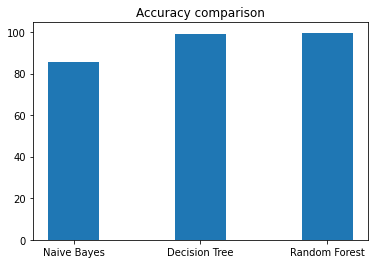

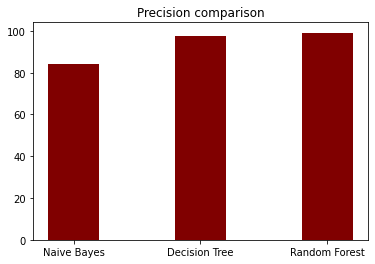

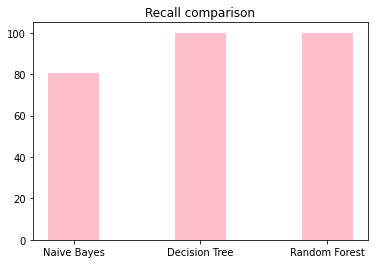

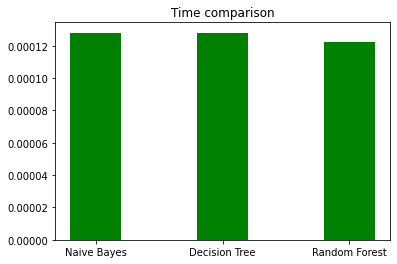

In [8]:
ca = {'Type':['Naive Bayes', 'Decision Tree', 'Random Forest'], 'Accuracy' : ["{0:.2f}".format(nb_accuracy*100), "{0:.2f}".format(dt_accuracy*100), "{0:.2f}".format(rf_accuracy*100) ], 'Precision' : ["{0:.2f}".format(nb_precision*100), "{0:.2f}".format(dt_precision*100) , "{0:.2f}".format(rf_precision*100) ], 'Recall' : ["{0:.2f}".format(nb_recall*100), "{0:.2f}".format(dt_recall*100) , "{0:.2f}".format(rf_recall*100)], "Time" : [nb_Time, dt_Time, rf_Time]}
ca_df = pd.DataFrame(ca)
print(ca_df)
print()
plt.title("Accuracy comparison")
plt.bar(ca_df['Type'], [float(x) for x in ca_df['Accuracy']], label="Accuracy", width = 0.4)
plt.show()
print()
plt.title("Precision comparison")
plt.bar(ca_df['Type'], [float(x) for x in ca_df['Precision']], label="Precision", width = 0.4, color = "maroon")
plt.show()
print()
plt.title("Recall comparison")
plt.bar(ca_df['Type'], [float(x) for x in ca_df['Recall']], label="Recall", width = 0.4, color = "pink")
plt.show()
print()
plt.title("Time comparison")
plt.bar(ca_df['Type'], [float(x) for x in ca_df['Time']], label="Time", width = 0.4, color = "green")
plt.show()
